### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [5]:
df['Unnamed: 2'].value_counts()

 bt not his girlfrnd... G o o d n i g h t . . .@"                                                                                                   3
 PO Box 5249                                                                                                                                        2
this wont even start........ Datz confidence.."                                                                                                     2
GN                                                                                                                                                  2
 don't miss ur best life for anything... Gud nyt..."                                                                                                2
 but dont try to prove it..\" .Gud noon...."                                                                                                        2
 Gud night...."                                                                                     

In [6]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.shape

(5572, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [11]:
df.columns = ['Category','Messages']

In [12]:
df.head()

,Category,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### EDA

In [13]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

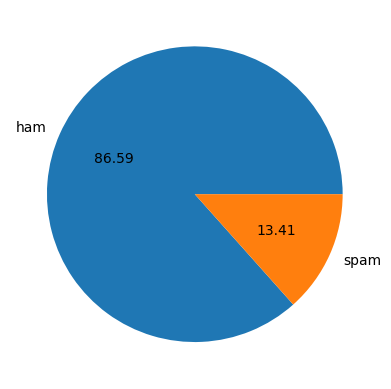

In [14]:
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

**Majority of the messages are non-spam**

In [47]:
df['message_length'] = df['Messages'].apply(len)   # Extracting the length from the messages

In [48]:
df.head()

,Category,Messages,message_length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
df['message_length'].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: message_length, dtype: float64

In [18]:
df[df['Category']=='ham']['message_length'].describe()

count    4825.000000
mean       71.023627
std        58.016023
min         2.000000
25%        33.000000
50%        52.000000
75%        92.000000
max       910.000000
Name: message_length, dtype: float64

In [19]:
df[df['Category']=='spam']['message_length'].describe()

count    747.000000
mean     138.866131
std       29.183082
min       13.000000
25%      132.500000
50%      149.000000
75%      157.000000
max      224.000000
Name: message_length, dtype: float64

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

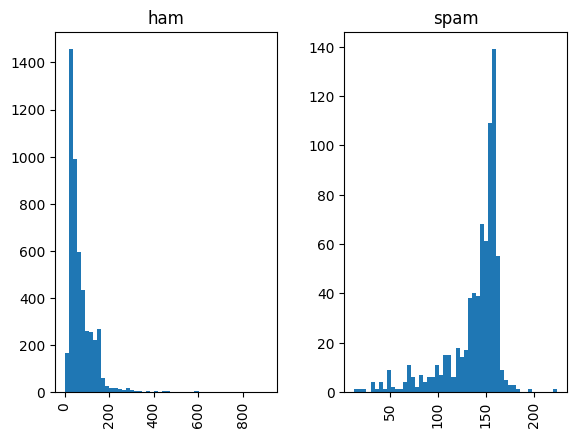

In [20]:
df.hist(column='message_length',by='Category',bins=50)

**We can see that on an average, spam messages tend to be longer than the non-spam messages**

### Data encoding

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

In [22]:
df['Category'].value_counts()

0    4825
1     747
Name: Category, dtype: int64

In [23]:
le.inverse_transform([0])

array(['ham'], dtype=object)

In [24]:
le.inverse_transform([1])

array(['spam'], dtype=object)

### Handling class imbalance

In [25]:
from sklearn.utils import resample

class_counts = df['Category'].value_counts()
minority_class = class_counts.idxmin()

majority_class = 1 - minority_class

df_majority = df[df['Category'] == majority_class]
df_minority = df[df['Category'] == minority_class]

df_majority_undersampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

df_balanced = pd.concat([df_majority_undersampled, df_minority])

df_balanced = df_balanced.sample(frac=1, random_state=42)

In [26]:
X = df_balanced['Messages']
y = df_balanced['Category']

In [27]:
X

1406    URGENT, IMPORTANT INFORMATION FOR O2 USER. TOD...
1006    Panasonic & BluetoothHdset FREE. Nokia FREE. M...
4369    Do you want a new Video handset? 750 any time ...
1662    Hi if ur lookin 4 saucy daytime fun wiv busty ...
1462    09066362231 URGENT! Your mobile No 07xxxxxxxxx...
                              ...                        
2806    December only! Had your mobile 11mths+? You ar...
4071    Loans for any purpose even if you have Bad Cre...
783     You have an important customer service announc...
5278    URGENT! Your Mobile number has been awarded wi...
2773    How come it takes so little time for a child w...
Name: Messages, Length: 1494, dtype: object

In [28]:
y

1406    1
1006    1
4369    1
1662    1
1462    1
       ..
2806    1
4071    1
783     1
5278    1
2773    1
Name: Category, Length: 1494, dtype: int64

In [29]:
y.value_counts()

1    747
0    747
Name: Category, dtype: int64

### Train test split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [32]:
X_train.shape

(1120,)

In [33]:
X_test.shape

(374,)

### Feature Extraction

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
feature_extractor = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [36]:
X_train_features = feature_extractor.fit_transform(X_train)
X_test_features = feature_extractor.transform(X_test)

In [37]:
X_train_features

<1120x3671 sparse matrix of type '<class 'numpy.float64'>'
	with 12170 stored elements in Compressed Sparse Row format>

### Data modelling and evaluation

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [40]:
logmodel = LogisticRegression()
logmodel.fit(X_train_features,y_train)

LogisticRegression()

In [41]:
y_pred = logmodel.predict(X_test_features)

In [42]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[189   3]
 [ 12 170]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       192
           1       0.98      0.93      0.96       182

    accuracy                           0.96       374
   macro avg       0.96      0.96      0.96       374
weighted avg       0.96      0.96      0.96       374



In [43]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Support Vector Machines': SVC()
}

results = {}

for model_name, model in models.items():
    model.fit(X_train_features, y_train)
    y_pred = model.predict(X_test_features)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

for model_name, accuracy in results.items():
    print(f'{model_name}: Accuracy = {accuracy:.2f}')
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print('--------------------------------------------------------------')

Logistic Regression: Accuracy = 0.96
[[189   3]
 [ 12 170]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       192
           1       0.98      0.93      0.96       182

    accuracy                           0.96       374
   macro avg       0.96      0.96      0.96       374
weighted avg       0.96      0.96      0.96       374

--------------------------------------------------------------
Naive Bayes: Accuracy = 0.94
[[189   3]
 [ 12 170]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       192
           1       0.98      0.93      0.96       182

    accuracy                           0.96       374
   macro avg       0.96      0.96      0.96       374
weighted avg       0.96      0.96      0.96       374

--------------------------------------------------------------
Support Vector Machines: Accuracy = 0.96
[[189   3]
 [ 12 170]]
              precision    recall  f1-score 

**Among the chosen models, Logistic Regression and SVM perform well with a f1-score of 0.96**

In [44]:
X_test[551]

"Hurry up, I've been weed-deficient for like three days"

In [ ]:
X_test_features[0]

<1x3671 sparse matrix of type '<class 'numpy.float64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [46]:
le.inverse_transform(logmodel.predict(X_test_features[0]))

array(['spam'], dtype=object)